In [1]:
#importing 

In [2]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

import datetime

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 18)

In [5]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
## NO  null values found

In [7]:
df.describe().transpose()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

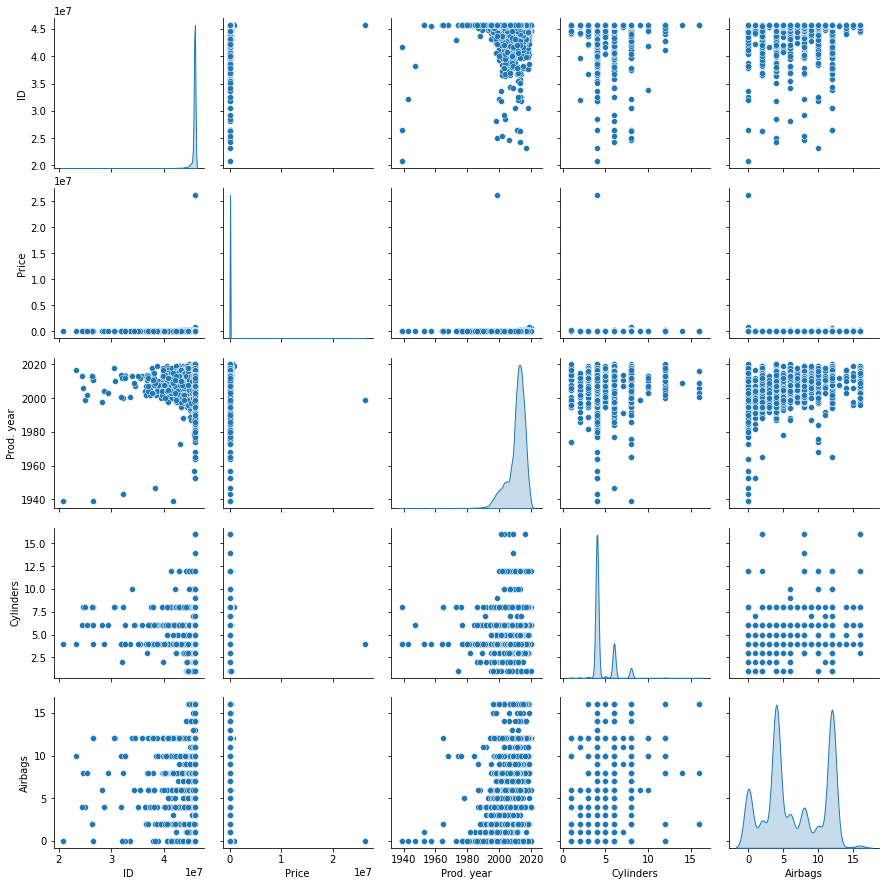

In [8]:
sns.pairplot(df, diag_kind='kde')

In [9]:
df.drop('ID',axis=1,inplace=True)

In [10]:
df['Levy']=df['Levy'].replace('-',np.nan)
df['Levy']=df['Levy'].astype(float)
levy_mean=0
df['Levy'].fillna(levy_mean,inplace=True)
df['Levy']=round(df['Levy'],2)

In [11]:
#since milage is in KM only we will remove 'km' from it and make it numerical
df['Mileage']=df['Mileage'].apply(lambda x:x.split(' ')[0])
df['Mileage']=df['Mileage'].astype('int')

In [12]:
df['Turbo']=df['Engine volume'].apply(lambda x:1 if 'Turbo' in str(x) else 0)
df['Engine volume']=df['Engine volume'].apply(lambda x:str(x).replace('Turbo',''))
df['Engine volume']=df['Engine volume'].astype(float)

In [13]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


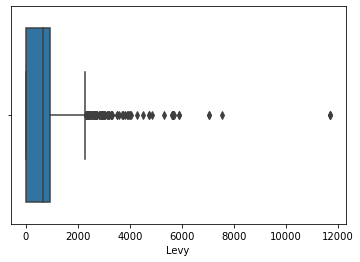

In [14]:
cols=['Levy','Engine volume', 'Mileage','Cylinders','Airbags']
sns.boxplot(df[cols[0]]);

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


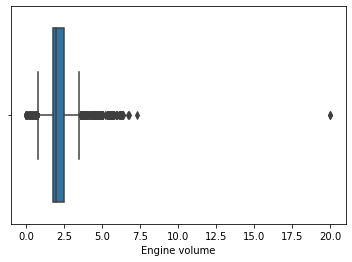

In [15]:
sns.boxplot(df[cols[1]]);

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


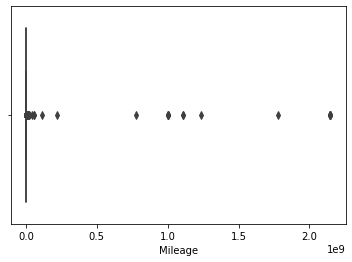

In [16]:
sns.boxplot(df[cols[2]]);

C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


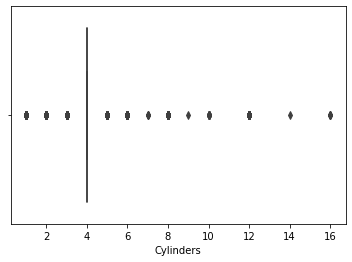

In [17]:
sns.boxplot(df[cols[3]]);


C:\Users\gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


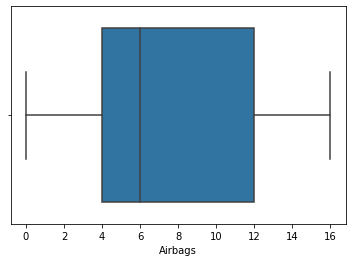

In [18]:
sns.boxplot(df[cols[4]]);

In [19]:
def find_outliers_limit(df,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper

In [20]:
def remove_outlier(df,col,upper,lower):

    # identify outliers

    outliers =[x for x in df[col] if x is upper]

    print('Identified outliers: %d' % len(outliers))

    # remove outliers

    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]

    print('Non-outlier observations: %d' % len(outliers_removed))

    final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

    return final


In [21]:
outlier_cols=['Levy','Engine volume','Mileage','Cylinders']

for col in outlier_cols:

    lower,upper=find_outliers_limit(df,col)

    df[col]=remove_outlier(df,col,upper,lower)

Levy
--------------------------------------------------
Percentiles: 25th=0.000, 75th=917.000, IQR=917.000
Lower: -1375.5  Upper: 2292.5
Identified outliers: 0
Non-outlier observations: 19076
Engine volume
--------------------------------------------------
Percentiles: 25th=1.800, 75th=2.500, IQR=0.700
Lower: 0.7500000000000002  Upper: 3.55
Identified outliers: 0
Non-outlier observations: 17856
Mileage
--------------------------------------------------
Percentiles: 25th=70139.000, 75th=188888.000, IQR=118749.000
Lower: -107984.5  Upper: 367011.5
Identified outliers: 0
Non-outlier observations: 18597
Cylinders
--------------------------------------------------
Percentiles: 25th=4.000, 75th=4.000, IQR=0.000
Lower: 4.0  Upper: 4.0
Identified outliers: 0
Non-outlier observations: 14367


<AxesSubplot:>

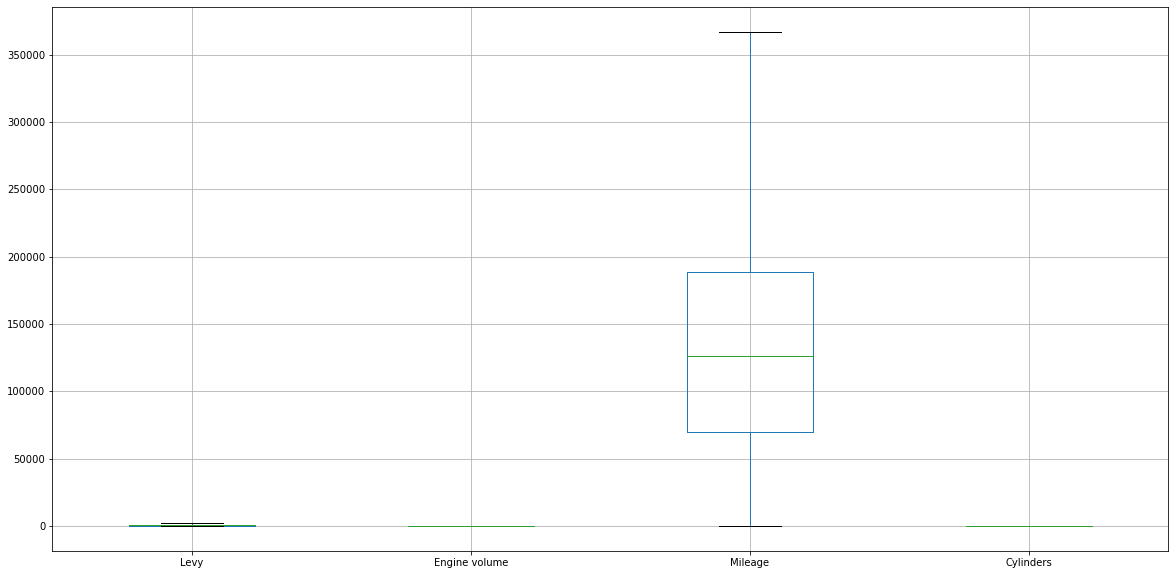

In [22]:
plt.figure(figsize=(20,10))
df[outlier_cols].boxplot()

In [23]:
labels=[0,1,2,3,4,5,6,7,8,9]
df['Mileage_bin']=pd.cut(df['Mileage'],len(labels),labels=labels)
df['Mileage_bin']=df['Mileage_bin'].astype(float)
labels=[0,1,2,3,4]
df['EV_bin']=pd.cut(df['Engine volume'],len(labels),labels=labels)
df['EV_bin']=df['EV_bin'].astype(float)

In [24]:
#Handling Categorical features

num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(include=object)
encoding=OrdinalEncoder()
cat_cols=cat_df.columns.tolist()
encoding.fit(cat_df[cat_cols])
cat_oe=encoding.transform(cat_df[cat_cols])
cat_oe=pd.DataFrame(cat_oe,columns=cat_cols)
cat_df.reset_index(inplace=True,drop=True)
cat_oe.head()
num_df.reset_index(inplace=True,drop=True)
cat_oe.reset_index(inplace=True,drop=True)
final_all_df=pd.concat([num_df,cat_oe],axis=1)


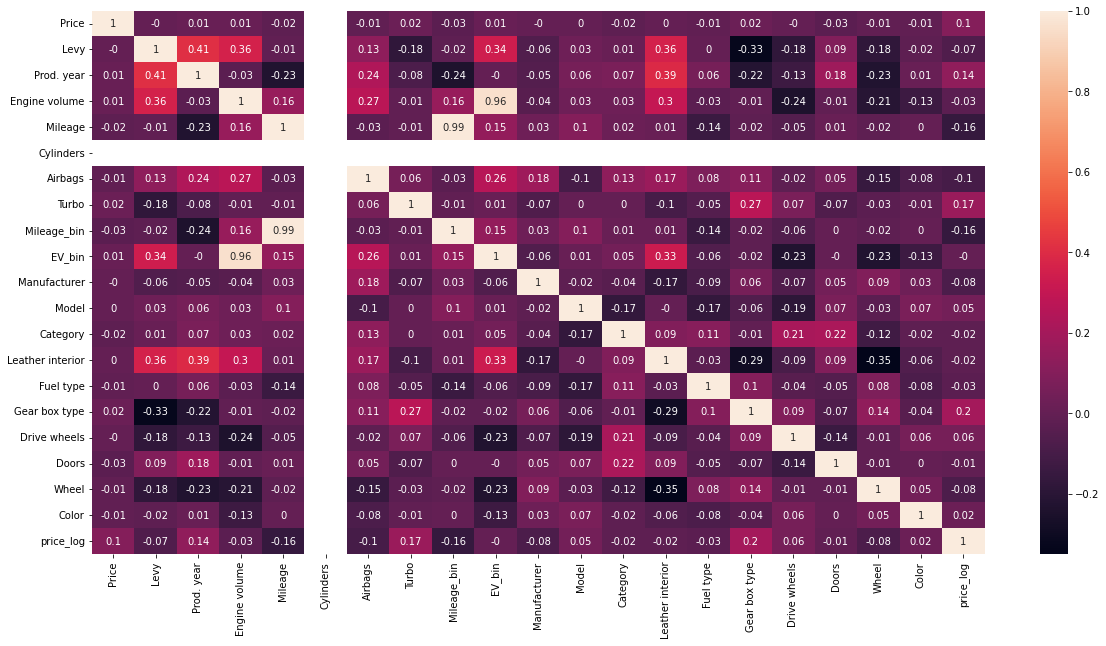

In [25]:
#Checking correlation
final_all_df['price_log']=np.log(final_all_df['Price'])
plt.figure(figsize=(20,10))
sns.heatmap(round(final_all_df.corr(),2),annot=True);
cols_drop=['Price','price_log','Cylinders']
final_all_df.columns
X=final_all_df.drop(cols_drop,axis=1)
y=final_all_df['Price']

In [26]:
# Data Splitting and Scaling

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [27]:
# Model Building

from sklearn.linear_model import SGDRegressor


def train_ml_model(x,y,model_type):
    if model_type=='lr':
        model=LinearRegression()
    elif model_type=='xgb':
        model=SGDRegressor()
    elif model_type=='rf':
        model=RandomForestRegressor()
    model.fit(X_train_scaled,np.log(y))
    return model



In [28]:
def model_evaluate(model,x,y):
    predictions=model.predict(x)
    predictions=np.exp(predictions)
    mse=mean_squared_error(y,predictions)
    mae=mean_absolute_error(y,predictions)
    mape=mean_absolute_percentage_error(y,predictions)
    msle=mean_squared_log_error(y,predictions)
    mse=round(mse,2)
    mae=round(mae,2)
    mape=round(mape,2)
    msle=round(msle,2)
    return [mse,mae,mape,msle]

In [29]:
model_lr=train_ml_model(X_train_scaled,y_train,'lr')


In [30]:
eval1 = model_evaluate(model_lr, X_train_scaled,y_train)
print("Mean squared error :", eval1[0])
print("Mean absolute error:", eval1[1])
print("Mean absolute percentage error :", eval1[2])
print("Mean squared log error :", eval1[3])

Mean squared error : 45329365481.58
Mean absolute error: 12698.85
Mean absolute percentage error : 10.95
Mean squared log error : 2.12


In [31]:
model_xgb=train_ml_model(X_train_scaled,y_train,'xgb')

In [32]:
eval2 = model_evaluate(model_xgb, X_train_scaled,y_train)
print("Mean squared error :", eval2[0])
print("Mean absolute error:", eval2[1])
print("Mean absolute percentage error :", eval2[2])
print("Mean squared log error :", eval2[3])

Mean squared error : 45334068642.72
Mean absolute error: 12819.93
Mean absolute percentage error : 11.16
Mean squared log error : 2.12


In [33]:
model_rf=train_ml_model(X_train_scaled,y_train,'xgb')

In [34]:
eval3 = model_evaluate(model_rf, X_train_scaled,y_train)
print("Mean squared error :", eval3[0])
print("Mean absolute error:", eval3[1])
print("Mean absolute percentage error :", eval3[2])
print("Mean squared log error :", eval3[3])

Mean squared error : 45344474631.93
Mean absolute error: 12992.68
Mean absolute percentage error : 10.85
Mean squared log error : 2.13
